# Project 1: Restaurants 🍔

## Due Saturday, October 30 at 11:59 pm

Welcome to Project 1! Projects in DSC 10 are similar in format to homeworks, but are different in a few key ways. First, a project is comprehensive, meaning that it draws upon everything we've learned this quarter so far. Second, since problems can vary quite a bit in difficulty, some problems will be worth more points than others. Finally, in a project, the problems are more open-ended; they will usually ask for some result, but won't tell you what method should be used to get it. There might be several equally-valid approaches, and several steps might be necessary. This is closer to how data science is done in "real life".

It is important that you **start early** on the project! It will take the place of a homework in the week that it is due, but you should also expect it to take longer than a homework. You are especially encouraged to **find a partner** to work through the project with. If you work in a pair, you must work with someone from your team, following the [Pair Programming Guidelines](https://dsc10.com/pair-programming/) on the course website. In particular, you must work together at the same time, and you are not allowed to split up the problems and each work on certain problems. If working in a pair, you should submit one notebook to Gradescope for the both of you. Use [this sheet](https://docs.google.com/spreadsheets/d/19tnetCMN1z9Kl57kKLtqNzT5ppjub1nDUniNjA-iXKE/edit#gid=0) to find someone else on your team to work with.

**Important**: The `otter` tests don't usually tell you that your answer is correct. More often, they help catch basic mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). Directly sharing answers between groups is not okay, but discussing problems with the course staff or with other students is encouraged.

**Please do not use for-loops or import any packages.** Loops in Python are slow, and looping over arrays and DataFrames should usually be avoided in favor of commands that are meant specifically for these objects. This entire project can be done without any loops, using the tools we've learned so far in DSC 10. Please do no import any additional packages - you don't need them, and our autograder may not be able to run your code if you do.

In [1]:
# Please don't change this cell but do run it.
import babypandas as bpd
import numpy as np
import matplotlib.pyplot as plt

import otter
grader = otter.Notebook()

## Outline

Use this outline to help you quickly navigate to the part of the project you're working on:
- [The Data](#data)    
- [Part 1. Chains](#part1) 
    - Questions 1.1 - 1.12    
- [Part 2. Cities](#part2) 
    - Questions 2.1 - 2.8
- [Part 3. Stars](#part3) 
    - Questions 3.1 - 3.5

<a id='data'></a>
## The Data

In this project, we will explore several 2020 restaurant rankings from [Restaurant Business](https://www.restaurantbusinessonline.com) (RB), a media brand that provides business intelligence insights for commercial restaurants.

Our data is split across three different CSV files, each of which contains a different set of restaurants, using a different ranking methodology. Run the cell below to load in our data as DataFrames.

In [2]:
future = bpd.read_csv('data/Future50.csv')

independents = bpd.read_csv('data/Independents100.csv')
# Ignore this, it fixes the format of the Sales column
independents = independents.assign(Sales=independents.get('Sales').apply(int))

chain_restaurants = bpd.read_csv('data/Top250.csv')

The `future` DataFrame contains information about the 50 fastest-growing restaurant chains in the US whose yearly sales are between 25 and 50 million dollars.  Because of the moderate range for yearly sales, the `future` DataFrame does not include restaurant giants like McDonald's and Starbucks. Instead, the restaurant chains in the `future` DataFrame are mid-sized restaurant chains that may boom in popularity in the future, hence the DataFrame's name.

The `future` DataFrame is sorted in descending order by percentage change in sales from 2019 to 2020 (`'YOY_Sales'`; YOY stands for "Year-over-Year"). `'Sales'` are reported in millions in dollars. The `'Location'` column refers to the city where the chain is headquartered, not to any specific location. 

Run the cell below to take a look at the `future` DataFrame, and [click here](https://www.restaurantbusinessonline.com/future-50) to see the ranking on RB's website.

In [3]:
future

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes
...,...,...,...,...,...,...,...,...,...
45,46,LA Crawfish,"McAllen, Texas",48,17.6%,25,13.6%,2050,Yes
46,47,&pizza,"Washington, D.C.",45,17.1%,35,9.4%,1350,No
47,48,Super Duper Burgers,"San Francisco, Calif.",39,16.9%,16,14.3%,2630,No
48,49,StoneFire Grill,"Agoura Hills, Calif.",31,16.0%,13,8.3%,2550,No


The `independents` DataFrame contains information about the 100 highest-grossing independent restaurants in the US, sorted by `'Sales'` in decreasing order.  A restaurant is classified as "independent" if it has fewer than five locations; unlike in the `future` DataFrame, the `'City'` column here corresponds to the actual location of the restaurant. Here, `'Sales'` are measured in dollars, not in millions of dollars.

In [4]:
independents

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served
0,1,Carmine's (Times Square),39080335,40,New York,N.Y.,469803.0
1,2,The Boathouse Orlando,35218364,43,Orlando,Fla.,820819.0
2,3,Old Ebbitt Grill,29104017,33,Washington,D.C.,892830.0
3,4,LAVO Italian Restaurant & Nightclub,26916180,90,New York,N.Y.,198500.0
4,5,Bryant Park Grill & Cafe,26900000,62,New York,N.Y.,403000.0
...,...,...,...,...,...,...,...
95,96,George's at the Cove,12194000,80,La Jolla,Calif.,250000.0
96,97,Le Coucou,12187523,95,New York,N.Y.,87070.0
97,98,Mi Vida,12032014,38,Washington,D.C.,226226.0
98,99,Upland,11965564,52,New York,N.Y.,171825.0


Finally, the `chain_restaurants` DataFrame contains information about the 250 largest restaurant chains in the US, sorted by `'Sales'` in decreasing order. Here, sales are measured in millions, so McDonald's sales value of `40412` really means \$40.4 billion dollars.

Run the cell below to take a look at the `chain_restaurants` DataFrame, and [click here](https://www.restaurantbusinessonline.com/top-500-chains) to see the ranking on RB's website.

In [5]:
chain_restaurants

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger
...,...,...,...,...,...,...,...,...,...
245,246,Rainforest Cafe,NaN,129,-10.4%,18,-5.3%,NaN,Varied Menu
246,247,PDQ,NaN,127,-5.5%,56,-11.1%,NaN,Chicken
247,248,Lupe Tortilla,NaN,127,12.1%,25,8.7%,NaN,Mexican
248,249,Cook-Out Restaurant,NaN,126,10.1%,270,7.1%,NaN,Burger


<a id='part1'></a>
## Part 1 – Chains 🍟

Let's start by asking questions about the `chain_restaurants` DataFrame; we'll take a closer look at our other two DataFrames later.

### Question 1.1 
**1 point**

The `chain_restaurants` DataFrame has many columns that we aren't going to look at. Below, create a new DataFrame called `chains` with only has the columns `'Rank'`, `'Restaurant'`, `'Sales'`, `'YOY_Sales'`, and `'Segment_Category'` from the `chain_restaurants` DataFrame.

<!--
BEGIN QUESTION
name: q1_1
points: 1
-->

In [6]:
chains = chain_restaurants.get(['Rank','Restaurant','Sales','YOY_Sales','Segment_Category'])
chains

,Rank,Restaurant,Sales,YOY_Sales,Segment_Category
0,1,McDonald's,40412,4.9%,Quick Service & Burger
1,2,Starbucks,21380,8.6%,Quick Service & Coffee Cafe
2,3,Chick-fil-A,11320,13.0%,Quick Service & Chicken
3,4,Taco Bell,11293,9.0%,Quick Service & Mexican
4,5,Burger King,10204,2.7%,Quick Service & Burger
...,...,...,...,...,...
245,246,Rainforest Cafe,129,-10.4%,Varied Menu
246,247,PDQ,127,-5.5%,Chicken
247,248,Lupe Tortilla,127,12.1%,Mexican
248,249,Cook-Out Restaurant,126,10.1%,Burger


In [7]:
grader.check("q1_1")

q1_1 results: All test cases passed!

### Question 1.2
**1 point**

We want to know the restaurant chain that ranks $n$th in RB's chain restaurant rankings; that is, the chain restaurant with the $n$th highest sales in 2020. But to do so for various values of $n$, we would have to write a long query every time. Create a function called `rank_chain` that takes as input a ranking $n$ between 1 and 250 and returns the name of the chain ranked $n$th. Example behavior of the function is shown below.

```py
>>> rank_chain(2)
'Starbucks'

>>> rank_chain(250)
'Jollibee'
```


<!--
BEGIN QUESTION
name: q1_2
-->

In [8]:
def rank_chain(n):
    restaurant = chains.set_index('Rank').get('Restaurant').loc[n]
    return restaurant

In [9]:
grader.check("q1_2")

q1_2 results: All test cases passed!

### Question 1.3
**1 point**

The `'Segment_Category'` describes the food and service of each chain. What are the most popular segment categories in `chains`?

Create an array called `ordered_segment_categories` containing all the segment categories, ordered from the most popular segment category to the least popular segment category in `chains`. 


<!--
BEGIN QUESTION
name: q1_3
-->

In [10]:
ordered_segment_categories = np.array(chains.groupby('Segment_Category').count().sort_values('Restaurant', ascending=False).reset_index().get('Segment_Category'))
ordered_segment_categories

array(['Varied Menu', 'Mexican', 'Quick Service & Burger',
       'Italian/Pizza', 'Burger', 'Family Style',
       'Casual Dining & Varied Menu', 'Pizza', 'Steak',
       'Quick Service & Pizza', 'Seafood', 'Bakery Cafe',
       'Family Dining & Family Style', 'Chicken', 'BBQ', 'Sandwich',
       'Sports Bar', 'Quick Service & Chicken', 'Fast Casual & Sandwich',
       'Frozen Desserts', 'Quick Service & Coffee Cafe', 'Snack',
       'Fast Casual & Chicken', 'Casual Dining & Steak',
       'Quick Service & Sandwich', 'Casual Dining & Italian/Pizza',
       'Family Casual', 'Coffee Cafe', 'Fast Casual & Burger',
       'Quick Service & Beverage', 'Asian', 'Asian/Noodle',
       'Fast Casual & Mexican', 'Casual Dining & Sports Bar',
       'Fast Casual & Asian/Noodle', 'Casual Dining & Seafood',
       'Quick Service & Frozen Desserts', 'Quick Service & Mexican',
       'Quick Service & Snack', 'Quick Service & Bakery Cafe',
       'Casual Dining & Asian', 'Ethnic', 'Fast Casual & Baker

In [11]:
grader.check("q1_3")

q1_3 results: All test cases passed!

### Question 1.4
**1 point**

In the previous question, we determined that the segment category that appeared most often was `'Varied Menu'`. It's not immediately obvious what that means!

Below, assign `varied_menu_only` to a DataFrame with only the rows in `chains` where the segment category was `'Varied Menu'`. **Don't sort or make any other modifications**.

<!--
BEGIN QUESTION
name: q1_4
-->

In [12]:
varied_menu_only = chains[chains.get('Segment_Category')=='Varied Menu']
varied_menu_only

,Rank,Restaurant,Sales,YOY_Sales,Segment_Category
102,103,O'Charley's,426,-7.6%,Varied Menu
119,120,Cooper's Hawk Winery & Restaurants,338,19.9%,Varied Menu
128,129,Ninety Nine Restaurants,324,2.1%,Varied Menu
135,136,Bar Louie,284,-5.6%,Varied Menu
149,150,Seasons 52,253,1.4%,Varied Menu
...,...,...,...,...,...
212,213,Grand Lux Cafe,157,1.2%,Varied Menu
225,226,Topgolf,144,14.6%,Varied Menu
229,230,Houlihan's,143,-21.2%,Varied Menu
240,241,54th Street Restaurant & Drafthouse,131,4.5%,Varied Menu


In [13]:
grader.check("q1_4")

q1_4 results: All test cases passed!

As you can see, the highest ranking `'Varied Menu'` segment category restaurant chain isn't very high. Have you heard of any of these chains before? The chains 'Seasons 52' and 'True Food Kitchen' in the `varied_menu` DataFrame are at the Westfield UTC mall in San Diego right next to campus. Have you been to either of them? 🤔

Remember that the data that we work with as data scientists is more than just a bunch of numbers, it is based on the world around us.

### Question 1.5
**2 points**

In the last two subparts we looked at the most common segment categories in `chains`. But what if we're interested in determining the segment categories that averaged the most sales?

Below, assign `top_selling_segments` to a DataFrame with two columns, `'Segment_Category'` and `'Average_Sales'`, such that:
- Each row corresponds to a single segment category, and the `'Average_Sales'` column contains the average (mean) sales for each category.
- Only the segment categories with average sales of over 2.5 billion dollars are included. (Note, \$2.5 billion is equivalent to `2500` in our data's units.)
- Rows are sorted by `'Average_Sales'` in decreasing order.

The first few rows of `top_selling_segments` should look like this:

|     | Segment_Category            |   Average_Sales     |
-----:|----------------------------:|--------------------:|
 **0**| Quick Service & Coffee Cafe |         7972.250000 |
 **1**| Quick Service & Burger      |         6106.460000 |
 **2**| Quick Service & Mexican     |         6071.500000 |

*Hint*: You might want to create a new DataFrame rather than renaming columns.

<!--
BEGIN QUESTION
name: q1_5
points: 2
-->

In [14]:
chains

,Rank,Restaurant,Sales,YOY_Sales,Segment_Category
0,1,McDonald's,40412,4.9%,Quick Service & Burger
1,2,Starbucks,21380,8.6%,Quick Service & Coffee Cafe
2,3,Chick-fil-A,11320,13.0%,Quick Service & Chicken
3,4,Taco Bell,11293,9.0%,Quick Service & Mexican
4,5,Burger King,10204,2.7%,Quick Service & Burger
...,...,...,...,...,...
245,246,Rainforest Cafe,129,-10.4%,Varied Menu
246,247,PDQ,127,-5.5%,Chicken
247,248,Lupe Tortilla,127,12.1%,Mexican
248,249,Cook-Out Restaurant,126,10.1%,Burger


In [15]:
chains_by_category=chains.groupby('Segment_Category').mean().sort_values('Sales', ascending=False).reset_index()
selling_segments = (
    chains_by_category
    .assign(Average_Sales=chains_by_category.get('Sales'))
    .get(['Segment_Category','Average_Sales'])
)
top_selling_segments = selling_segments[selling_segments.get('Average_Sales')>2500]
top_selling_segments

,Segment_Category,Average_Sales
0,Quick Service & Coffee Cafe,7972.250000
1,Quick Service & Burger,6106.461538
2,Quick Service & Mexican,6071.500000
3,Fast Casual & Bakery Cafe,5890.000000
4,Quick Service & Chicken,3769.833333
5,Quick Service & Sandwich,3741.250000
6,Quick Service & Pizza,2664.500000


In [16]:
grader.check("q1_5")

q1_5 results: All test cases passed!

### Question 1.6
**2 points**

Notice that many of the categories with high average sales include "Quick Service". Let us compare the "Quick Service" restaurant chains and the non-"Quick Service" chains. Find the difference between the average sales for all "Quick Service" restaurant chains and the average sales for all non-"Quick Service" chains in the `chains` DataFrame. Save the answer to `quick_sales_diff`.

*Note 1*: If the restaurant chain category has the word "Quick Service" in it, it is a "Quick Service" chain.

*Note 2*: Your answer should be positive.

*Hint*: You can use the `-` operator on a boolean Series to negate the entire Series. Example behavior of the operation is shown below:

```py
>>> s = bpd.Series(np.array[False, True, True])
>>> s
0   False
1   True
1   True
>>> -s
0   True
1   False
1   False
```


<!--
BEGIN QUESTION
name: q1_6
points: 2
-->

In [17]:
quick_sales_average = (
    selling_segments[selling_segments.get('Segment_Category').str.contains('Quick Service')]
    .get('Average_Sales')
    .mean()
)
non_quick_sales_average = (
    selling_segments[selling_segments.get('Segment_Category').str.contains('Quick Service')==False]
    .get('Average_Sales')
    .mean()
)
quick_sales_diff = abs(quick_sales_average-non_quick_sales_average)
quick_sales_diff

2206.230463903381

In [18]:
grader.check("q1_6")

q1_6 results: All test cases passed!

### Question 1.7
**2 points**

So far, we haven't really looked at the `'YOY_Sales'` column in `chains`. Remember, the values in `'YOY_Sales'` tell us the percentage change in sales from 2019 to 2020 for each restaurant chain (YOY means "Year-over-Year"); a `'YOY_Sales'` value of 8.6% means the restaurant earned 8.6% more in sales in 2020 than it did in 2019.

In [19]:
# Returns an array of the first five elements in the YOY_Sales column just for us to see
np.array(chains.get('YOY_Sales').take(np.arange(5)))

array(['4.9%', '8.6%', '13.0%', '9.0%', '2.7%'], dtype=object)

Since the values in the `'YOY_Sales'` column are stored as strings, not numbers, we can't reliably sort by `'YOY_Sales'`. (Try it out – if you sort by `'YOY_Sales'` in decreasing order, it will tell you the highest `'YOY_Sales'` any restaurant had was 9.9%, though there are several restaurants with `'YOY_Sales'` values of over 10%.)

In [20]:
# Use this cell for experimentation, if you want!

#### Part a)
**1 point**

As we saw above, a string like '4.9%' doesn't help us. Write a function `percent_str_to_prop` that takes in a percentage string and returns the corresponding proportion, which should be a decimal between 0 and 1. Example behavior of the function is shown below.

```py
>>> percent_str_to_prop('-15.8%')
-0.158

>>> percent_str_to_prop('4.8%')
0.048
```

<!--
BEGIN QUESTION
name: q1_7a
-->

In [21]:
def percent_str_to_prop(pct_str):
    prop = float(pct_str.replace('%',''))/100
    return prop

In [22]:
grader.check("q1_7a")

q1_7a results: All test cases passed!

#### Part b)
**1 point**

Now that we have a function to change a percentage string into a decimal proportion, create a new DataFrame called `chains_YOY` which has the same columns as `chains`, except the values in the `'YOY_Sales'` column should be proportions.

<!--
BEGIN QUESTION
name: q1_7b
-->

In [23]:
chains_YOY = chains.assign(YOY_Sales=chains.get('YOY_Sales').apply(percent_str_to_prop))
chains_YOY

,Rank,Restaurant,Sales,YOY_Sales,Segment_Category
0,1,McDonald's,40412,0.049,Quick Service & Burger
1,2,Starbucks,21380,0.086,Quick Service & Coffee Cafe
2,3,Chick-fil-A,11320,0.130,Quick Service & Chicken
3,4,Taco Bell,11293,0.090,Quick Service & Mexican
4,5,Burger King,10204,0.027,Quick Service & Burger
...,...,...,...,...,...
245,246,Rainforest Cafe,129,-0.104,Varied Menu
246,247,PDQ,127,-0.055,Chicken
247,248,Lupe Tortilla,127,0.121,Mexican
248,249,Cook-Out Restaurant,126,0.101,Burger


In [24]:
grader.check("q1_7b")

q1_7b results: All test cases passed!

### Question 1.8
**1 point**

The `'Sales'` data in the `chains` DataFrame comes from 2020. We want to find out what the sales were for 2019. Create a new column in `chains_YOY` named ``Sales_2019``, which contains the sales for each chain in 2019, in millions of dollars. 

<!--
BEGIN QUESTION
name: q1_8
-->

In [25]:
def last_year_sales(YOY_Sales):
    last_year = 1+YOY_Sales
    return last_year

chains_YOY = chains_YOY.assign(one_plus_YOY_Sales=chains_YOY.get('YOY_Sales').apply(last_year_sales))
chains_YOY = chains_YOY.assign(Sales_2019=chains_YOY.get('Sales')/chains_YOY.get('one_plus_YOY_Sales')).drop(columns='one_plus_YOY_Sales')
chains_YOY

,Rank,Restaurant,Sales,YOY_Sales,Segment_Category,Sales_2019
0,1,McDonald's,40412,0.049,Quick Service & Burger,38524.308866
1,2,Starbucks,21380,0.086,Quick Service & Coffee Cafe,19686.924494
2,3,Chick-fil-A,11320,0.130,Quick Service & Chicken,10017.699115
3,4,Taco Bell,11293,0.090,Quick Service & Mexican,10360.550459
4,5,Burger King,10204,0.027,Quick Service & Burger,9935.735151
...,...,...,...,...,...,...
245,246,Rainforest Cafe,129,-0.104,Varied Menu,143.973214
246,247,PDQ,127,-0.055,Chicken,134.391534
247,248,Lupe Tortilla,127,0.121,Mexican,113.291704
248,249,Cook-Out Restaurant,126,0.101,Burger,114.441417


In [26]:
grader.check("q1_8")

q1_8 results: All test cases passed!

### Question 1.9
**1 point**

The Year-over-Year sales metric may not be very intuitive for some. So let's categorize the `'YOY_Sales'` column into 5 categories as follows:

| Growth Category | Interpretation | Year-over-Year Sales |
| --- | --- | --- |
| 5 | rapid increase | $\geq 0.10$ |
| 4 | steady increase | $[0.025, 0.10)$ |
| 3 | stagnant | $[-0.025, 0.025)$ | 
| 2 | steady decrease | $[-0.10, -0.025)$ |
| 1 | rapid decrease | $< -0.10$ |

Remember, $[a, b)$ means greater than or equal to $a$ and less than $b$.

Create a new DataFrame called `chains_growth` with all the columns in `chains_YOY` plus a sixth column called `'Growth_Category'` with the corresponding numerical growth category. The first few rows of `chains_growth` should look like this:

|     |   Rank | Restaurant   |   Sales | YOY_Sales   | Segment_Category            | Sales_2019 | Growth_Category   |
-----:|-------:|-------------:|--------:|------------:|----------------------------:|-:|------------------:|
 **0**|      1 | McDonald's   |   40412 | 0.049        | Quick Service & Burger      | 38524.308866 |4   |
 **1**|      2 | Starbucks    |   21380 | 0.086        | Quick Service & Coffee Cafe | 19686.924494|4   |
 **2**|      3 | Chick-fil-A  |   11320 | 0.13      | Quick Service & Chicken     | 10017.699115|5    |
 **3**|      4 | Taco Bell    |   11293 | 0.09        | Quick Service & Mexican     |10360.550459|4   |
 **4**|      5 | Burger King  |   10204 | 0.027        | Quick Service & Burger      | 9935.735151|4  |

*Note*: At the time this project was released, we haven't yet covered how to solve problems like this. You may want to revisit this later when we've learned the appropriate tools in class.

<!--
BEGIN QUESTION
name: q1_9
-->

In [27]:
def Growth_Category(YOY_Sales):
    if YOY_Sales < -0.1:
        return 1
    elif YOY_Sales < -0.025:
        return 2
    elif YOY_Sales < 0.025:
        return 3
    elif YOY_Sales < 0.1:
        return 4
    else:
        return 5

chains_growth = chains_YOY.assign(Growth_Category=chains_YOY.get('YOY_Sales').apply(Growth_Category))
chains_growth

,Rank,Restaurant,Sales,YOY_Sales,Segment_Category,Sales_2019,Growth_Category
0,1,McDonald's,40412,0.049,Quick Service & Burger,38524.308866,4
1,2,Starbucks,21380,0.086,Quick Service & Coffee Cafe,19686.924494,4
2,3,Chick-fil-A,11320,0.130,Quick Service & Chicken,10017.699115,5
3,4,Taco Bell,11293,0.090,Quick Service & Mexican,10360.550459,4
4,5,Burger King,10204,0.027,Quick Service & Burger,9935.735151,4
...,...,...,...,...,...,...,...
245,246,Rainforest Cafe,129,-0.104,Varied Menu,143.973214,1
246,247,PDQ,127,-0.055,Chicken,134.391534,2
247,248,Lupe Tortilla,127,0.121,Mexican,113.291704,5
248,249,Cook-Out Restaurant,126,0.101,Burger,114.441417,5


In [28]:
grader.check("q1_9")

q1_9 results: All test cases passed!

### Question 1.10
**1 point**

Let's find the chains that earned the prestigious `'Growth_Category'` value of 5 (rapid increase). In the variable `rapid_growth_chains`, create an array of the names of such chains, sorted in alphabetical order.

<!--
BEGIN QUESTION
name: q1_10
-->

In [29]:
rapid_growth_chains = np.array(chains_growth[chains_growth.get('Growth_Category')==5].sort_values('Restaurant').set_index('Restaurant').index)
rapid_growth_chains

array(['Black Bear Diner', 'Blaze Pizza', 'Chick-fil-A',
       'Chicken Salad Chick', 'Chipotle Mexican Grill',
       'Cook-Out Restaurant', "Cooper's Hawk Winery & Restaurants",
       "Culver's", "Del Frisco's Double Eagle Steak House",
       'Dutch Bros. Coffee', 'First Watch', 'Fogo de Chao',
       "Freddy's Frozen Custard & Steakburgers", 'Gyu-Kaku',
       "Jersey Mike's Subs", 'Jollibee', 'Lazy Dog Restaurant & Bar',
       'Lupe Tortilla', 'MOD Pizza', 'Metro Diner', "Miller's Ale House",
       'Mission BBQ', "Mountain Mike's Pizza", 'Ocean Prime',
       'Panda Express', 'Paris Baguette', 'Popeyes Louisiana Kitchen',
       "Portillo's", "Raising Cane's Chicken Fingers",
       'Saltgrass Steak House', 'Shake Shack', 'Smoothie King',
       'Sweetgreen', "Taziki's Mediterranean Cafe", 'Texas Roadhouse',
       'Texas de Brazil Churrascaria', 'The Habit Burger Grill',
       'Topgolf', "Torchy's Tacos", 'Tropical Smoothie Cafe',
       'True Food Kitchen', "Uncle Julio's",

In [30]:
grader.check("q1_10")

q1_10 results: All test cases passed!

Do you know any of these restaurants? If not, maybe you will in a few years! 📈

### Question 1.11
**2 points**

Since there are five possible values for `'Growth_Category'`, we might expect each growth category value to be associated with about $1/5 = 20\%$ of restaurants. Let's see if that's the case. Set the variable `unpopular_growth_category` to the number (1 through 5) representing the growth category associated with the fewest number of restaurants. Set the variable `unpopular_proportion` to the proportion of restaurants with this growth category. 

<!--
BEGIN QUESTION
name: q1_11
points: 2
-->

In [31]:
unpopular_growth_category = chains_growth.groupby('Growth_Category').count().sort_values('Rank').index[0]
unpopular_proportion = (chains_growth.groupby('Growth_Category').count().sort_values('Rank').get('Rank').loc[1])/chains_growth.shape[0]
print(f"The most unpopular growth category was {unpopular_growth_category}; the proportion of restaurants in this category was {unpopular_proportion}.")

The most unpopular growth category was 1; the proportion of restaurants in this category was 0.048.


In [32]:
grader.check("q1_11")

q1_11 results: All test cases passed!

This is a good time to pause and remember the nature of our data. Since we're looking at only the top 250 chain restaurants by 2020 sales, our data set does not accurately represent what was going on in the restaurant industry as a whole. There may be many chain restaurants whose sales dropped significantly from 2019 to 2020, but these are less likely to be included in our dataset. We might see a very different distribution of growth categories if we were to look at a data set of the all chain restaurants instead of just the top 250. Understanding the context of how our data was collected is crucial to being able to interpret results and draw meaningful conclusions.

### Question 1.12
**2 points**

Earlier, we investigated how each segment category performed in terms of average sales for 2020. Now we'll compare segment categories by their growth category. 

Say you are looking to invest in some restaurant chains and instead of sales, you are more interested in growth, as determined by the `'Growth_Category'`. Plot a vertical bar chart showing the mean growth category for the top 20 segment categories. 

Use the bar chart to help you decide the best three segment categories of restaurants to invest in. Assign your result, as an array of three strings, to the variable `invest_segment_categories`. 

*Note*: It's okay to type by hand the values in `invest_segment_categories` after looking at your bar chart.

array(['Healthy', 'Fast Casual & Pizza', 'Ethnic'], dtype='<U19')

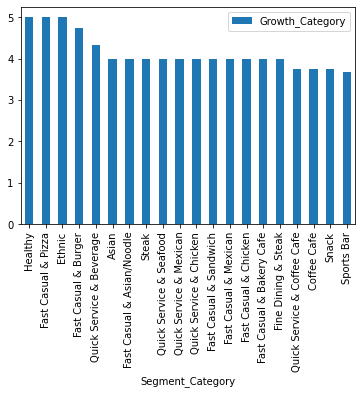

In [33]:
# Make your vertical bar chart here.
Avg_Growth_per_Segment = chains_growth.groupby('Segment_Category').mean().sort_values('Growth_Category',ascending=False).iloc[:20]
graph = Avg_Growth_per_Segment.plot(kind='bar',y='Growth_Category')
invest_segment_categories = np.array(['Healthy','Fast Casual & Pizza','Ethnic'])
invest_segment_categories

In [34]:
grader.check("q1_12")

q1_12 results: All test cases passed!

<a id='part2'></a>
## Part 2 – Cities 🌆

Awesome! Now that we've gotten a feel for the `chains` dataset, let's move on to the `future` and `independents` datasets. Since both datasets include location information, we'll focus on identifying "hot food cities". 🔥 

Remember, the `future` DataFrame contains information about the fastest-growing chains with sales between \\$25 and \\$50 million – there's no overlap between the chains in `future` and the chains in `chains` since the "smallest" chain in `chains` made over \\$125 million last year. In `future`,  we're given the locations where the chains are headquartered. In the `independents` DataFrame, the restaurants are not chains, so we're given their actual locations.

### Question 2.1
**1 point**

Let's start with the `independents` DataFrame. Unlike most of the restaurants in `chains`, many independent restaurants in our data set are 💲💲💲💲. Assign `most_expensive_restaurant` to a list containing the [`'Restaurant'`, `'City'`, `'Average Check'`] of the restaurant with the highest average check in the `independents` dataset.

<!--
BEGIN QUESTION
name: q2_1
-->

In [35]:
all_data_most_expensive_restaurant = independents.sort_values('Average Check', ascending=False)
most_expensive_restaurant = [all_data_most_expensive_restaurant.get('Restaurant').iloc[0], 
                             all_data_most_expensive_restaurant.get('City').iloc[0], 
                             all_data_most_expensive_restaurant.get('Average Check').iloc[0]]
most_expensive_restaurant

['Del Posto', 'New York', 194]

In [36]:
grader.check("q2_1")

q2_1 results: All test cases passed!

### Question 2.2
**1 point**

Which restaurant in `independents` has the lowest sales per meal served? Assign the restaurant name to the variable `lowest_spm_restaurant` and also assign the sales per meal for this restaurant to `lowest_spm`.

<!--
BEGIN QUESTION
name: q2_2
-->

In [37]:
sales_per_meal_served = (
    independents
    .assign(Sales_per_Meal_Served = independents.get('Sales')/independents.get('Meals Served'))
    .sort_values('Sales_per_Meal_Served')
)

lowest_spm_restaurant = sales_per_meal_served.set_index('Restaurant').index[0]
lowest_spm = sales_per_meal_served.get('Sales_per_Meal_Served').iloc[0]
print(f"The restaurant with the lowest sales per meal is {lowest_spm_restaurant}; the sales per meal at this restaurant was {lowest_spm} dollars.")

The restaurant with the lowest sales per meal is Zehnder's of Frankenmuth; the sales per meal at this restaurant was 16.749998435913103 dollars.


In [38]:
grader.check("q2_2")

q2_2 results: All test cases passed!

### Question 2.3
**1 point**

Unless you spend a lot of time in Michigan ✋, chances are you've probably never heard of this restaurant. Here's how the tourism site [Pure Michigan](https://www.michigan.org/property/zehnder-s-frankenmuth) describes it:

*America's largest family restaurant serves approximately one million guests per year with old world hospitality. Nine dining rooms that seat more than 1,500 guests, Zehnder's offers a full service menu that features all-you-can-eat family style chicken dinners, seafood, steaks, fresh baked goods and European desserts.*

Sorting `independents` by `Meals Served` shows that the `most_expensive_restaurant` served far fewer meals than the `lowest_spm_restaurant`, as you might expect. 

In [39]:
independents.sort_values('Meals Served')

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served
96,97,Le Coucou,12187523,95,New York,N.Y.,87070.0
31,32,Del Posto,18625033,194,New York,N.Y.,95000.0
37,38,Prime Steakhouse,18248030,173,Las Vegas,Nev.,113600.0
36,37,Lavo Italian Restaurant & Lounge,18386262,97,Las Vegas,Nev.,115500.0
63,64,Prime & Provisions,15100000,130,Chicago,Ill.,116154.0
...,...,...,...,...,...,...,...
1,2,The Boathouse Orlando,35218364,43,Orlando,Fla.,820819.0
2,3,Old Ebbitt Grill,29104017,33,Washington,D.C.,892830.0
49,50,Frankenmuth Bavarian Inn,17388751,19,Frankenmuth,Mich.,899284.0
13,14,Junior's (Times Square),23640652,23,New York,N.Y.,914500.0


This may make you wonder if more expensive restaurants serve fewer meals in general. Create a data visualization based on the `independents` DataFrame that helps you answer this question.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_3
manual: true
-->

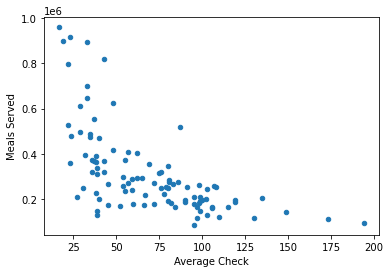

In [40]:
# Make your data visualization here.
graph = independents.plot(kind='scatter',x='Average Check',y='Meals Served')

<!-- END QUESTION -->



### Question 2.4
**3 points**

Let's start working with the cities in the `independents` DataFrame. Run the following cell to get a feel for the type of cities that appear.

In [41]:
independents

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served
0,1,Carmine's (Times Square),39080335,40,New York,N.Y.,469803.0
1,2,The Boathouse Orlando,35218364,43,Orlando,Fla.,820819.0
2,3,Old Ebbitt Grill,29104017,33,Washington,D.C.,892830.0
3,4,LAVO Italian Restaurant & Nightclub,26916180,90,New York,N.Y.,198500.0
4,5,Bryant Park Grill & Cafe,26900000,62,New York,N.Y.,403000.0
...,...,...,...,...,...,...,...
95,96,George's at the Cove,12194000,80,La Jolla,Calif.,250000.0
96,97,Le Coucou,12187523,95,New York,N.Y.,87070.0
97,98,Mi Vida,12032014,38,Washington,D.C.,226226.0
98,99,Upland,11965564,52,New York,N.Y.,171825.0


Some cities appear many times, like `'New York'` and `'Washington'`, and some appear only once, like `'Bal Harbour'`.

Below, assign `city_checks` to a DataFrame with index `'City'` and column `'Average Check'`, containing the **median** `'Average Check'` in all cities with at least 3 restaurants in the dataset, sorted by median `'Average Check'` in decreasing order. The first few rows of `city_checks` should look like this:

| City          |   Average Check  |
|--------------:|-----------------------:|
| **Las Vegas**     |                     99.0 |
| **Miami**         |                     98.0 |
| **New York**      |                     84.0 |


*Note*: This question is challenging and takes multiple steps, so feel free to break it down and use as many lines of code as you need.

<!--
BEGIN QUESTION
name: q2_4
points: 3
-->

In [42]:
independents_groupby_city = independents.groupby('City').count().sort_values('Restaurant')

at_least_three_restaurant = (
    independents_groupby_city[independents_groupby_city.get('Restaurant')>=3]
    .reset_index()
    .get(['City'])
)

average_check_median = independents.groupby('City').median().reset_index()

average_check_median_less_than_three = (
    average_check_median[(average_check_median.get('City')=='Miami')
                        |(average_check_median.get('City')=='San Francisco')
                        |(average_check_median.get('City')=='Washington')
                        |(average_check_median.get('City')=='Las Vegas')
                        |(average_check_median.get('City')=='Chicago')
                        |(average_check_median.get('City')=='New York')]
                        .get(['City','Average Check'])
)

city_checks = (
    at_least_three_restaurant
    .merge(average_check_median_less_than_three, left_on='City',right_on='City')
    .sort_values('Average Check', ascending=False)
    .set_index('City')
)
city_checks

,Average Check
City,
Las Vegas,99.0
Miami,98.0
New York,84.0
Chicago,82.0
San Francisco,54.0
Washington,37.0


In [43]:
grader.check("q2_4")

q2_4 results: All test cases passed!

### Question 2.5
**1 point**

Now we'll look at the cities in the `future` DataFrame.

In [44]:
future

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes
...,...,...,...,...,...,...,...,...,...
45,46,LA Crawfish,"McAllen, Texas",48,17.6%,25,13.6%,2050,Yes
46,47,&pizza,"Washington, D.C.",45,17.1%,35,9.4%,1350,No
47,48,Super Duper Burgers,"San Francisco, Calif.",39,16.9%,16,14.3%,2630,No
48,49,StoneFire Grill,"Agoura Hills, Calif.",31,16.0%,13,8.3%,2550,No


We're eventually going to want to merge `independents` and `future` by city, but right now we can't do that, since `future` does not have a column with just the name of the city in it. `future`'s `'Location'` column also includes the state's name.

Below, create a DataFrame called `future_with_city` with the `'Rank'`, `'Restaurant'`, `'Sales'`, and `'YOY_Sales'` columns from `future` but with an additional column, `'City'`, that contains the name of the city in which the restaurant is headquartered. The first few rows of `future_with_city` are shown below; the order of the columns in `future_with_city` **must** match the output below.

|    |   Rank | Restaurant   | City             |   Sales | YOY_Sales   |
|-----:|-------:|-------------:|-----------------:|--------:|------------:|
**0**     |      1 | Evergreens   | Seattle          |      24 | 130.5%      |
**1**       |      2 | Clean Juice  | Charlotte        |      44 | 121.9%      |
**2**       |      3 | Slapfish     | Huntington Beach |      21 | 81.0%       |
 **3**      |      4 | Clean Eatz   | Wilmington       |      25 | 79.7%       |
  **4**     |      5 | Pokeworks    | Irvine           |      49 | 77.1%       |

*Hint*: If you pass in a `list` of columns to `.get`, the resulting DataFrame will have only the columns you listed, in the order that you listed them.

<!--
BEGIN QUESTION
name: q2_5
-->

In [45]:
def split_location(city):
    city = city.split(', ')
    city = city[0]
    return city

future_with_city = (
    future
    .assign(City=future
    .get('Location')
    .apply(split_location))
    .get(['Rank','Restaurant','City'])
    .assign(Sales=future.get('Sales'), YOY_Sales=future.get('YOY_Sales'))
)
future_with_city

,Rank,Restaurant,City,Sales,YOY_Sales
0,1,Evergreens,Seattle,24,130.5%
1,2,Clean Juice,Charlotte,44,121.9%
2,3,Slapfish,Huntington Beach,21,81.0%
3,4,Clean Eatz,Wilmington,25,79.7%
4,5,Pokeworks,Irvine,49,77.1%
...,...,...,...,...,...
45,46,LA Crawfish,McAllen,48,17.6%
46,47,&pizza,Washington,45,17.1%
47,48,Super Duper Burgers,San Francisco,39,16.9%
48,49,StoneFire Grill,Agoura Hills,31,16.0%


In [46]:
grader.check("q2_5")

q2_5 results: All test cases passed!

### Question 2.6
**3 points**

We will say a "hot food city" is a city with at least one restaurant in the Independents 100 (`independents`) and at least one restaurant in the Future 50 (`future_with_city`).

Below, create a DataFrame `hot_cities` indexed by `'City'` and having two columns,  `'Independents_100'` and `'Future_50'`. Each row should correspond to a city, and the values in the columns should represent the number of restaurants in that city that appear on the Independents 100 and Future 50, respectively. The first few rows of `hot_cities` should look like this:

| City          |   Independents_100 |   Future_50 |
|--------------:|-------------------:|------------:|
|**Atlanta**       |                  2 |           1 |
|**Denver**        |                  1 |           1 |
|**Los Angeles**|                     1 |           1 |

*Hint*: This question requires you to use data from multiple DataFrames. How can you combine data from different DataFrames?

<!--
BEGIN QUESTION
name: q2_6
points: 3
-->

In [47]:
Independents_100 = (
    independents
    .groupby('City')
    .count()
    .assign(Independents_100=independents.groupby('City').count().get('Rank'))
    .get(['Independents_100'])
)
Future_50 = (
    future_with_city
    .groupby('City')
    .count()
    .assign(Future_50=future_with_city.groupby('City').count().get('Rank'))
    .get(['Future_50'])
)

hot_cities = Independents_100.merge(Future_50, left_index=True, right_index=True)
hot_cities

,Independents_100,Future_50
City,,
Atlanta,2,1
Denver,1,1
Los Angeles,1,1
New York,21,8
San Francisco,5,2
Washington,9,1


In [48]:
grader.check("q2_6")

q2_6 results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 2.7
**1 point**

To visualize the `hot_cities` DataFrame, create an overlaid horizontal bar chart showing, for each hot city, how many of that city's restaurants appear in each of the `independents` and `future` DataFrames.



<!--
BEGIN QUESTION
name: q2_7
manual: true
-->

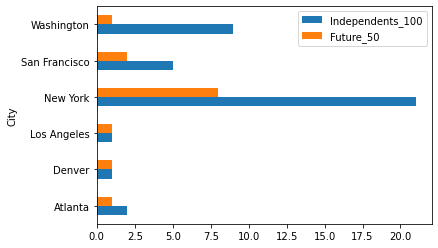

In [49]:
# Make your overlaid horizontal bar chart here.
graph = hot_cities.plot(kind='barh')

<!-- END QUESTION -->



### Question 2.8
**2 points**

For each city in `hot_cities`, let us define "food hotness" of a city as the sum of the `Independents_100` and `Future_50` columns of `hot_cities`. In other words, the food hotness of a city is the total number of restaurants in `independents` located in that city plus the total number of mid-size chains in `future` headquartered there. 

Now, we want to compare the food hotness of a city with its population. Is it simply the case that larger cities are considered hotter because they have larger populations? How do we measure the "foodiness" of a city, taking into account its population?

Use the `populations` dataset loaded below to visually compare food hotness and 2021 population using a scatter plot. Then, using your scatter plot, assign to `foodiest_city` the name of the city with the highest food hotness per capita. Food lovers, this is where you might want to plan your next vacation! ✈️


In [50]:
populations = bpd.read_csv("data/populations.csv")
populations

,rank,name,usps,pop2021,pop2010,growth,density,aland_sqmi
0,1,New York,NY,8230290,8190210,0.0049,27400,300.381
1,2,Los Angeles,CA,3983540,3795510,0.0495,8494,468.956
2,3,Chicago,IL,2679080,2697480,-0.0068,11783,227.369
3,4,Houston,TX,2323660,2100280,0.1064,3630,640.194
4,5,Phoenix,AZ,1733630,1449040,0.1964,3349,517.673
...,...,...,...,...,...,...,...,...
195,196,Miramar,FL,142445,122300,0.1647,4937,28.853
196,197,Round Rock,TX,142418,100772,0.4133,3933,36.213
197,198,Metairie,LA,142135,138481,0.0264,6111,23.259
198,199,Olathe,KS,142119,126269,0.1255,2306,61.642


'Washington'

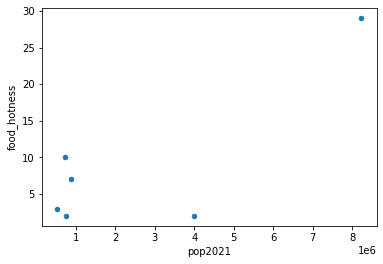

In [51]:
# Make your scatter plot here.
pop2021 = populations.get(['name','pop2021'])
hot_cities_with_food_hotness = (
    hot_cities
    .assign(food_hotness=hot_cities.get('Independents_100')+hot_cities.get('Future_50'))
)
hot_cities_pop=hot_cities_with_food_hotness.merge(pop2021, left_index=True, right_on='name')
graph = hot_cities_pop.plot(kind='scatter', x='pop2021', y='food_hotness')
foodiest_city = 'Washington'
foodiest_city

In [52]:
grader.check("q2_8")

q2_8 results: All test cases passed!

<a id='part3'></a>
## Part 3 – Stars ⭐️

So far, we have been looking at restaurant data from a company that provides business intelligence for restaurants. Therefore, our data has focused on important business concepts, like sales and growth. But are these profitable, fast-growing restaurants actually serving up delicious food that we want to eat? For that information, we ask the people of Yelp. 

In this section, we'll work with a dataset of Yelp ratings from March 2021 for most (but not all) of the restaurants in `independents`. In the cell below, we load in our Yelp data as a DataFrame called `ratings`.

In [53]:
ratings = bpd.read_csv('data/independents_ratings.csv')
ratings

,Restaurant,City,Rating
0,15th Street Fisheries,Fort Lauderdale,3.5
1,Abe & Louie's,Boston,4.0
2,Acme Feed & Seed,Nashville,4.0
3,Angus Barn,Raleigh,4.0
4,Atlanta Fish Market,Atlanta,3.5
...,...,...,...
86,Top of the World at the STRAT,Las Vegas,4.5
87,Upland,New York,4.0
88,Virgil's Real Barbecue,New York,3.5
89,Virgil's Real Barbecue,Las Vegas,4.0


### Question 3.1
**1 point**

It's worth thinking about why this Yelp data includes `'City'` – isn't it enough to just have the name of the restaurant and its rating?

Well, no – not if there are multiple restaurants with the same name! Below, assign `duplicate_restaurants` to an array containing the names of restaurants in `independents` that appear more than once. You don't need to sort them in any particular order.

In [54]:
duplicate_restaurants = np.array(
    independents
    .groupby('Restaurant')
    .count()[independents.groupby('Restaurant').count().get('Rank')>1]
    .index
)
duplicate_restaurants

array(['Gibsons Bar & Steakhouse',
       "Joe's Seafood, Prime Steak & Stone Crab",
       "Virgil's Real Barbecue"], dtype=object)

In [55]:
grader.check("q3_1")

q3_1 results: All test cases passed!

Next, we'll create a new DataFrame called `independents_with_ratings` by merging `independents` and `ratings` on both `'Restaurant'` and `'City'`.

We need to merge by both columns to correctly handle the duplicate restaurants we identified above. Think about what would happen if we merged by only `'Restaurant'`.

We haven't yet seen how to merge two DataFrames on multiple columns, but it turns out that if you just omit all the optional parameters in the call to `merge`, the DataFrames will be merged on all column labels that are common to both DataFrames.

Recall the column names of the `independents` and `ratings` DataFrames by running the next two cells.

In [56]:
independents.columns

Index(['Rank', 'Restaurant', 'Sales', 'Average Check', 'City', 'State',
       'Meals Served'],
      dtype='object')

In [57]:
ratings.columns

Index(['Restaurant', 'City', 'Rating'], dtype='object')

The column names appearing in both DataFrames are exactly `'Restaurant'` and `'City'`, the two columns we want to merge on. This makes our call to `merge` simple. Run the cell below to merge the two DataFrames based on `'Restaurant'` and `'City'`.

In [58]:
independents_with_ratings = independents.merge(ratings) 
independents_with_ratings

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served,Rating
0,1,Carmine's (Times Square),39080335,40,New York,N.Y.,469803.0,4.0
1,2,The Boathouse Orlando,35218364,43,Orlando,Fla.,820819.0,4.0
2,4,LAVO Italian Restaurant & Nightclub,26916180,90,New York,N.Y.,198500.0,2.5
3,5,Bryant Park Grill & Cafe,26900000,62,New York,N.Y.,403000.0,3.5
4,6,Gibsons Bar & Steakhouse,25409952,80,Chicago,Ill.,348567.0,4.0
...,...,...,...,...,...,...,...,...
86,95,Franciscan Crab Restaurant,12218147,59,San Francisco,Calif.,240000.0,3.5
87,96,George's at the Cove,12194000,80,La Jolla,Calif.,250000.0,4.0
88,97,Le Coucou,12187523,95,New York,N.Y.,87070.0,4.0
89,99,Upland,11965564,52,New York,N.Y.,171825.0,4.0


### Question 3.2
**2 points**

For each state, find the proportion of independent restaurants in that state that have at least a 4 star rating. Save your result to a `Series` called `state_proportions` indexed by state name and sorted in ascending order.

<!--
BEGIN QUESTION
name: q3_2
points: 2
-->

In [59]:
total_restaurant_each_state = (
    independents_with_ratings
    .groupby('State')
    .count()
    .get(['Restaurant'])
)
at_least_four_star_restaurant = (
    independents_with_ratings[independents_with_ratings.get('Rating')>=4.0]
    .groupby('State')
    .count()
    .get(['Restaurant'])
)

def propotion_calculation(state):
    if state in at_least_four_star_restaurant.index:
        return at_least_four_star_restaurant.loc[state].get('Restaurant')/total_restaurant_each_state.loc[state].get('Restaurant')
    else:
        return 0

state_proportions = bpd.DataFrame().assign(
    State = np.array(total_restaurant_each_state.reset_index().get('State')),
    At_Least_Four_Star_Prop = np.array(total_restaurant_each_state.reset_index().get('State').apply(propotion_calculation))
).set_index('State').sort_values('At_Least_Four_Star_Prop').get('At_Least_Four_Star_Prop')

state_proportions

State
Mich.    0.0
N.J.     0.0
Fla.     0.0
Va.      0.0
Colo.    0.0
        ... 
Mass.    1.0
N.C.     1.0
Ore.     1.0
Pa.      1.0
Tenn.    1.0
Name: At_Least_Four_Star_Prop, Length: 18, dtype: float64

In [60]:
grader.check("q3_2")

q3_2 results: All test cases passed!

In [61]:
## HIDDEN TEST
np.isclose(state_proportions.loc["Calif."], 0.5833333333333334)

True

In [62]:
## HIDDEN TEST
np.isclose(state_proportions.mean(), 0.580707872374539)

True

<!-- BEGIN QUESTION -->

### Question 3.3
**1 point**

Are higher-rated restaurants more expensive? Make a vertical bar chart of restaurant `'Rating'` versus **median**`'Average Check'` to see if there is an association between these variables. 

<!--
BEGIN QUESTION
name: q3_3
manual: true
-->

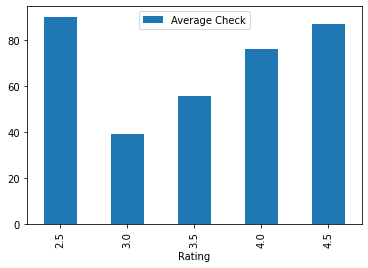

In [63]:
# Make your vertical bar chart here.
graph = independents_with_ratings.groupby('Rating').median().reset_index().plot(kind='bar',x='Rating',y='Average Check')

<!-- END QUESTION -->



This is a very interesting result! One possible explanation is that people who go to really expensive restaurants are hard to please. 

### Question 3.4 
**3 points**

In the bar chart above, we were thinking of `'Rating'` as a categorical variable. Now let's treat `'Rating'` as a numerical variable and look at its distribution to understand what kind of ratings the restaurants in `independents_with_ratings` receive. 

#### Part a)
**1 point**

Set the variable `rating_bins` to an array of values such that:
- a  histogram of `'Rating'` with these bins has each distinct value of `'Rating'` in a separate bin, 
- there are no spaces between the bins, 
- the first bin includes the lowest value in the `'Rating'` column, and 
- the last bin includes the highest value in the `'Rating'` column.

<!--
BEGIN QUESTION
name: q3_4a
-->


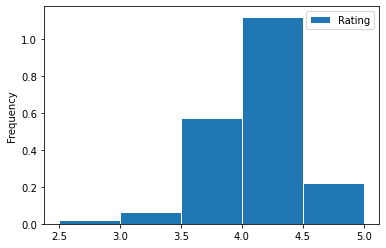

In [64]:
rating_bins = np.arange(2.5,5.5,0.5)
independents_with_ratings.plot(kind='hist', y='Rating', bins = rating_bins, density=True, ec='w');

In [65]:
grader.check("q3_4a")

q3_4a results: All test cases passed!

#### Part b)
**1 point**

Your histogram should show you that very few restaurants in `independents_with_ratings` got the lowest rating. In fact, there is only one! Set `worst_restaurant` to the name of this restaurant and set `worst_restaurant_avg_check` to the amount of the average check at this restaurant. 
<!--
BEGIN QUESTION
name: q3_4b
-->

In [66]:
worst_restaurant = independents_with_ratings.sort_values('Rating').get('Restaurant').iloc[0]
worst_restaurant_avg_check = independents_with_ratings.sort_values('Rating').get('Average Check').iloc[0]
print(f"The worst restaurant is {worst_restaurant}; the average check at this restaurant is {worst_restaurant_avg_check} dollars.")

The worst restaurant is LAVO Italian Restaurant & Nightclub; the average check at this restaurant is 90 dollars.


In [67]:
grader.check("q3_4b")

q3_4b results: All test cases passed!

Notice that this explains the interesting result we found in our bar chart from Question 3.3. Our bar chart made it seem like low-rated restaurants were really expensive, but this was based only on a single bad expensive restaurant. Perhaps it's better to go one place for Italian food and then go to a separate nightclub? 🤷🏽‍♀️

#### Part c)
**1 point**

In a density histogram, it can be hard to tell the exact height of a bar from looking at the histogram, but if you know the data from which the histogram was generated, you should be able to figure it out. Use `independents_with_ratings` to determine the exact height of the bar in the histogram that corresponds to restaurants with a rating of 3.5 stars. Save your result as `hist_height`.

*Hint*: You can check if your answer is approximately correct by inspecting the histogram in Part (a).

<!--
BEGIN QUESTION
name: q3_4c
-->

In [68]:
hist_height = (independents_with_ratings[independents_with_ratings.get('Rating')==3.5].shape[0])/(independents_with_ratings.shape[0])/0.5
hist_height

0.5714285714285714

In [69]:
grader.check("q3_4c")

q3_4c results: All test cases passed!

### Question 3.5
**3 points**

Lastly, we want to examine the relationship between average check and star rating, separately in each city. To do this, we can use `.groupby` with subgroups. Create a DataFrame called `check_by_city_and_rating` that shows the **median** `'Average Check'` value of restaurants for each city-rating combination. Since there are many such pairs, limit their number in two ways:
- Only include cities that have at least three restaurants in `independents_with_rating`.
- Only include full stars earned in the rating. For example, a rating of 3.5 should be counted the same as a rating of 3.0 for this problem.

The first few rows of `check_by_city_and_rating` should look like this:


<img src="./images/last_output.png" width=300/>


*Hint*: The function `np.floor` should be useful here. Feel free to look up what it does.

*Note*: This question is similar to Question 2.4, where we looked at the median `'Average Check'` by city. Referring back to how you solved that problem might be helpful. As with Question 2.4, this is a challenging problem that takes multiple steps, so feel free to break it down and use as many lines of code as you need.


<!--
BEGIN QUESTION
name: q3_5
points: 3
-->

In [70]:
def rounded_rating(rating):
    if rating<3:
        return 2.0
    elif rating<4:
        return 3.0
    elif rating<5:
        return 4.0
    else:
        return 5.0
    
at_least_three_restaurants = (
    independents_with_ratings
    .groupby('City')
    .count()[independents_with_ratings.groupby('City').count().get('Rank')>=3]
    .reset_index()
    .get(['City'])
)
at_least_three_restaurants_city = (
    independents_with_ratings[(independents_with_ratings.get('City')=='Miami')
                             |(independents_with_ratings.get('City')=='San Francisco')
                             |(independents_with_ratings.get('City')=='Washington')
                             |(independents_with_ratings.get('City')=='Las Vegas')
                             |(independents_with_ratings.get('City')=='Chicago')
                             |(independents_with_ratings.get('City')=='New York')]
                             .get(['Average Check','City','Rating'])
)


check_by_city_and_rating = (
    at_least_three_restaurants_city
    .assign(Rounded_Rating=at_least_three_restaurants_city.get('Rating').apply(rounded_rating))
).get(['Average Check','City','Rounded_Rating']).groupby(['City','Rounded_Rating']).median()
check_by_city_and_rating

Average Check
City          Rounded_Rating               
Chicago       3.0                      83.5
              4.0                      82.0
Las Vegas     3.0                      97.0
              4.0                     101.0
Miami         3.0                      88.0
...                                     ...
New York      2.0                      90.0
              3.0                      62.0
              4.0                      88.5
San Francisco 3.0                      56.5
              4.0                      45.0

[11 rows x 1 columns]

In [71]:
grader.check("q3_5")

q3_5 results: All test cases passed!

## Congratulations! You've completed Project 1!

All you need to do now is submit your assignment:

1. Select Kernel -> Restart & Run All to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using File -> Download as -> Notebook (.ipynb), then upload your notebook to Gradescope. Don't forget to add your partner to your group on Gradescope!

If running all the tests at once causes a test to fail that didn't fail when you ran the notebook in order, check to see if you changed a variable's value later in your code. Make sure to use new variable names instead of reusing ones that are used in the tests. 

Remember, the tests here and on Gradescope just check the format of your answers. We will run correctness tests after the assignment's due date has passed.

In [72]:
grader.check_all()

q1_1 results: All test cases passed!

q1_10 results: All test cases passed!

q1_11 results: All test cases passed!

q1_12 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q1_6 results: All test cases passed!

q1_7a results: All test cases passed!

q1_7b results: All test cases passed!

q1_8 results: All test cases passed!

q1_9 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q2_6 results: All test cases passed!

q2_8 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_4a results: All test cases passed!

q3_4b results: All test cases passed!

q3_4c results: All test cases passed!

q3_5 results: All test cases passed!